In [1]:
# https://github.com/dafiti/causalimpact

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

In [2]:
eurusd = pd.read_csv("eurusd.csv")
eurusd

,Value
0,1.0416
1,1.0476
2,1.0598
3,1.0560
4,1.0576
...,...
244,1.1839
245,1.1867
246,1.1902
247,1.1952


In [3]:
eurusd=np.array(eurusd)
eurusd

array([[1.0416],
       [1.0476],
       [1.0598],
       [1.056 ],
       [1.0576],
       [1.0572],
       [1.0501],
       [1.0666],
       [1.0625],
       [1.0695],
       [1.0682],
       [1.063 ],
       [1.074 ],
       [1.0749],
       [1.0743],
       [1.067 ],
       [1.069 ],
       [1.0681],
       [1.0794],
       [1.0758],
       [1.0802],
       [1.0792],
       [1.0731],
       [1.069 ],
       [1.0708],
       [1.0658],
       [1.065 ],
       [1.0603],
       [1.0577],
       [1.0597],
       [1.066 ],
       [1.0614],
       [1.0551],
       [1.0555],
       [1.0586],
       [1.058 ],
       [1.0624],
       [1.0618],
       [1.0564],
       [1.0514],
       [1.0552],
       [1.0586],
       [1.0582],
       [1.0547],
       [1.0586],
       [1.0667],
       [1.067 ],
       [1.0645],
       [1.063 ],
       [1.0738],
       [1.0742],
       [1.0754],
       [1.081 ],
       [1.08  ],
       [1.0787],
       [1.0806],
       [1.0882],
       [1.0852],
       [1.0756

In [4]:
gbpusd = pd.read_csv("gbpusd.csv")

In [5]:
gbpusd=np.array(gbpusd)
gbpusd

array([[1.2256],
       [1.2299],
       [1.2415],
       [1.2314],
       [1.2167],
       [1.2165],
       [1.2118],
       [1.2211],
       [1.2198],
       [1.2388],
       [1.2309],
       [1.2319],
       [1.2485],
       [1.2531],
       [1.262 ],
       [1.2579],
       [1.2531],
       [1.2478],
       [1.2585],
       [1.2643],
       [1.2541],
       [1.2504],
       [1.245 ],
       [1.2486],
       [1.2543],
       [1.2516],
       [1.2502],
       [1.251 ],
       [1.2465],
       [1.2465],
       [1.2477],
       [1.2428],
       [1.2465],
       [1.2456],
       [1.2548],
       [1.2499],
       [1.2473],
       [1.2427],
       [1.2318],
       [1.2267],
       [1.2249],
       [1.2243],
       [1.2209],
       [1.2152],
       [1.2166],
       [1.2158],
       [1.2234],
       [1.2168],
       [1.2222],
       [1.237 ],
       [1.2372],
       [1.2365],
       [1.2479],
       [1.2476],
       [1.2526],
       [1.2491],
       [1.2583],
       [1.2503],
       [1.2411

In [6]:
# y is the time series, x is the covariate

X = eurusd
y = gbpusd

In [7]:
X=X.reshape(-1)
X

array([1.0416, 1.0476, 1.0598, 1.056 , 1.0576, 1.0572, 1.0501, 1.0666,
       1.0625, 1.0695, 1.0682, 1.063 , 1.074 , 1.0749, 1.0743, 1.067 ,
       1.069 , 1.0681, 1.0794, 1.0758, 1.0802, 1.0792, 1.0731, 1.069 ,
       1.0708, 1.0658, 1.065 , 1.0603, 1.0577, 1.0597, 1.066 , 1.0614,
       1.0551, 1.0555, 1.0586, 1.058 , 1.0624, 1.0618, 1.0564, 1.0514,
       1.0552, 1.0586, 1.0582, 1.0547, 1.0586, 1.0667, 1.067 , 1.0645,
       1.063 , 1.0738, 1.0742, 1.0754, 1.081 , 1.08  , 1.0787, 1.0806,
       1.0882, 1.0852, 1.0756, 1.0726, 1.0698, 1.0655, 1.0664, 1.0661,
       1.0651, 1.0616, 1.0606, 1.0614, 1.0611, 1.063 , 1.0625, 1.066 ,
       1.0706, 1.0707, 1.0758, 1.0694, 1.0846, 1.0941, 1.0872, 1.0864,
       1.0895, 1.0912, 1.091 , 1.092 , 1.0967, 1.0996, 1.0928, 1.0875,
       1.0873, 1.0869, 1.0926, 1.0979, 1.1072, 1.1134, 1.113 , 1.119 ,
       1.1236, 1.1198, 1.1175, 1.1218, 1.117 , 1.1183, 1.1236, 1.1214,
       1.127 , 1.125 , 1.1266, 1.1236, 1.1217, 1.119 , 1.1204, 1.1194,
      

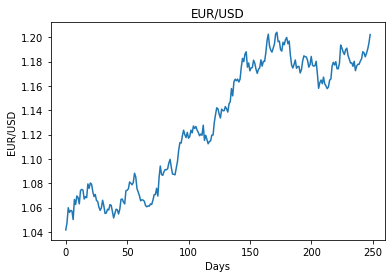

In [8]:
plt.plot(X)
plt.title("EUR/USD")
plt.xlabel("Days")
plt.ylabel("EUR/USD")
plt.show()

In [9]:
y=y.reshape(-1)
y

array([1.2256, 1.2299, 1.2415, 1.2314, 1.2167, 1.2165, 1.2118, 1.2211,
       1.2198, 1.2388, 1.2309, 1.2319, 1.2485, 1.2531, 1.262 , 1.2579,
       1.2531, 1.2478, 1.2585, 1.2643, 1.2541, 1.2504, 1.245 , 1.2486,
       1.2543, 1.2516, 1.2502, 1.251 , 1.2465, 1.2465, 1.2477, 1.2428,
       1.2465, 1.2456, 1.2548, 1.2499, 1.2473, 1.2427, 1.2318, 1.2267,
       1.2249, 1.2243, 1.2209, 1.2152, 1.2166, 1.2158, 1.2234, 1.2168,
       1.2222, 1.237 , 1.2372, 1.2365, 1.2479, 1.2476, 1.2526, 1.2491,
       1.2583, 1.2503, 1.2411, 1.2489, 1.2537, 1.2479, 1.2437, 1.2488,
       1.2486, 1.2398, 1.2418, 1.2484, 1.25  , 1.2522, 1.2531, 1.2587,
       1.2769, 1.2789, 1.283 , 1.2783, 1.2783, 1.2836, 1.2838, 1.2889,
       1.2938, 1.2917, 1.2921, 1.2916, 1.291 , 1.295 , 1.2942, 1.2939,
       1.2939, 1.2885, 1.288 , 1.2917, 1.2912, 1.2944, 1.3009, 1.3018,
       1.3006, 1.2984, 1.2935, 1.2954, 1.2795, 1.2858, 1.2905, 1.2894,
       1.2885, 1.2917, 1.2901, 1.2941, 1.2939, 1.2737, 1.2658, 1.2739,
      

In [10]:
y

array([1.2256, 1.2299, 1.2415, 1.2314, 1.2167, 1.2165, 1.2118, 1.2211,
       1.2198, 1.2388, 1.2309, 1.2319, 1.2485, 1.2531, 1.262 , 1.2579,
       1.2531, 1.2478, 1.2585, 1.2643, 1.2541, 1.2504, 1.245 , 1.2486,
       1.2543, 1.2516, 1.2502, 1.251 , 1.2465, 1.2465, 1.2477, 1.2428,
       1.2465, 1.2456, 1.2548, 1.2499, 1.2473, 1.2427, 1.2318, 1.2267,
       1.2249, 1.2243, 1.2209, 1.2152, 1.2166, 1.2158, 1.2234, 1.2168,
       1.2222, 1.237 , 1.2372, 1.2365, 1.2479, 1.2476, 1.2526, 1.2491,
       1.2583, 1.2503, 1.2411, 1.2489, 1.2537, 1.2479, 1.2437, 1.2488,
       1.2486, 1.2398, 1.2418, 1.2484, 1.25  , 1.2522, 1.2531, 1.2587,
       1.2769, 1.2789, 1.283 , 1.2783, 1.2783, 1.2836, 1.2838, 1.2889,
       1.2938, 1.2917, 1.2921, 1.2916, 1.291 , 1.295 , 1.2942, 1.2939,
       1.2939, 1.2885, 1.288 , 1.2917, 1.2912, 1.2944, 1.3009, 1.3018,
       1.3006, 1.2984, 1.2935, 1.2954, 1.2795, 1.2858, 1.2905, 1.2894,
       1.2885, 1.2917, 1.2901, 1.2941, 1.2939, 1.2737, 1.2658, 1.2739,
      

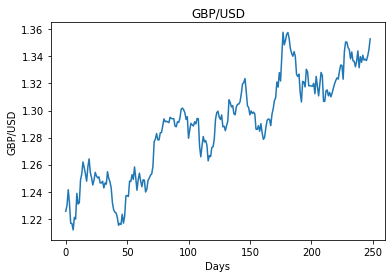

In [11]:
plt.plot(y)
plt.title("GBP/USD")
plt.xlabel("Days")
plt.ylabel("GBP/USD")
plt.show()

In [12]:
y.shape

(249,)

In [13]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 229]
post_period = [230, 248]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1.34               25.46
Prediction (s.d.)         1.35 (0.02)        25.57 (0.3)
95% CI                    [1.31, 1.38]       [24.98, 26.14]

Absolute effect (s.d.)    -0.01 (0.02)       -0.11 (0.3)
95% CI                    [-0.04, 0.03]      [-0.68, 0.48]

Relative effect (s.d.)    -0.45% (1.15%)     -0.45% (1.15%)
95% CI                    [-2.67%, 1.86%]    [-2.67%, 1.86%]

Posterior tail-area probability p: 0.36
Posterior prob. of a causal effect: 64.34%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1.34. In the absence of an
intervention, we would have expected an average response of 1.35.
The 95% interval of this counterfactual prediction is [1.31, 1.38].
Subtracting this prediction from the observed response yields
an 

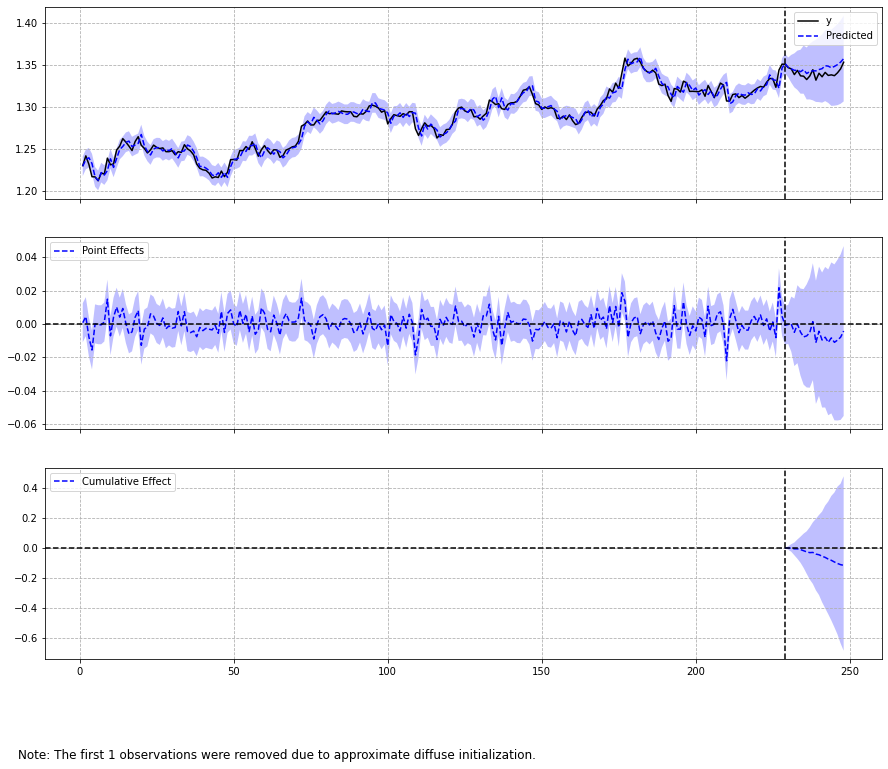

In [14]:
ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()